In [63]:
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf

from utilities.script.image_utils import load_numpy_dataset, show_image_number, dataset_ratio_check

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
# Load dataset based on K-fold
K = 4
train_dataset_load_path = np.load("utilities/data/"+ str(K) + "/train_"+ str(K) + ".npz")
test_dataset_load_path = np.load("utilities/data/"+ str(K) + "/test_"+ str(K) + ".npz")

train_dataset, test_dataset = load_numpy_dataset(train_dataset_load_path, test_dataset_load_path, K)

x_train, y_train = train_dataset
x_test, y_test = test_dataset

['paper' 'rock' 'scissors']
Corresponding label : rock


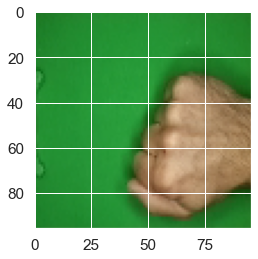

In [65]:
# Show loaded sample
SAMPLE_INDEX = 300
show_image_number(x_test[SAMPLE_INDEX], y_test[SAMPLE_INDEX])

In [66]:
dataset_ratio_check(y_test)

Class=0, n=189 (34.552%)
Class=1, n=186 (34.004%)
Class=2, n=172 (31.444%)


In [38]:
#x_train, y_train = tf.convert.to_tensor(x_train, dtype=tf.float32), tf.convert.to_tensor(y_train, dtype=tf.int8)
#x_test, y_test = tf.convert.to_tensor(x_test, dtype=tf.float32), tf.convert.to_tensor(y_test, dtype=tf.int8)

In [67]:
# Preserve real label in numerical
y_train_numeric, y_test_numeric = y_train.copy(), y_test.copy()

In [68]:
from tensorflow.experimental import numpy as tnp

x_train, x_test = tnp.asarray(x_train), tnp.asarray(x_test)
y_train, y_test = tnp.asarray(y_train), tnp.asarray(y_test)

In [69]:
# Switch the labels into categorical

y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [70]:
def scheduler(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 15:
        return 0.0005
    elif epoch >= 15:
        return 0.0001

scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [71]:
LEARNING_RATE = 0.001

def define_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(96, 96, 3)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.summary()

    return model

In [72]:
model = define_model(optimizer=tf.keras.optimizers.Adam(learning_rate=scheduler(0)))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 96, 96, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 48, 48, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 16)      

In [73]:
with tf.device("/device:GPU:0"):
    history_adam = model.fit(x_train, y_train, epochs=20, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/20
206/206 [==============================] - 12s 52ms/step - loss: 0.5851 - accuracy: 0.7623 - val_loss: 0.2568 - val_accuracy: 0.9232
Epoch 2/20
206/206 [==============================] - 11s 52ms/step - loss: 0.1810 - accuracy: 0.9397 - val_loss: 0.1655 - val_accuracy: 0.9452
Epoch 3/20
206/206 [==============================] - 10s 50ms/step - loss: 0.1073 - accuracy: 0.9647 - val_loss: 0.0921 - val_accuracy: 0.9689
Epoch 4/20
206/206 [==============================] - 10s 51ms/step - loss: 0.0981 - accuracy: 0.9671 - val_loss: 0.1712 - val_accuracy: 0.9342
Epoch 5/20
206/206 [==============================] - 10s 50ms/step - loss: 0.0591 - accuracy: 0.9823 - val_loss: 0.0808 - val_accuracy: 0.9854
Epoch 6/20
206/206 [==============================] - 10s 50ms/step - loss: 0.0411 - accuracy: 0.9860 - val_loss: 0.1489 - val_accuracy: 0.9506
Epoch 7/20
206/206 [==============================] - 10s 50ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0803 - val_accuracy:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


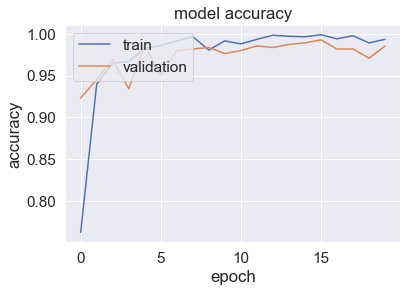

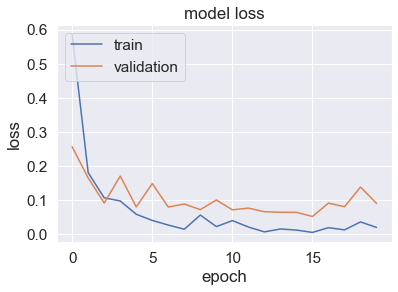

In [85]:
%load_ext autoreload
%autoreload 2


from utilities.script.validation_utils import get_training_plot, get_confusion_matrix, get_classification_report

get_training_plot(history_adam, metric='accuracy', save=True, savepath="weight/shallow/doc/acc_" + str(K) + ".jpg")
get_training_plot(history_adam, metric='loss', save=True, savepath="weight/shallow/doc/loss_" + str(K) + ".jpg")

18/18 [==============================] - 1s 42ms/step

Confusion Matrix



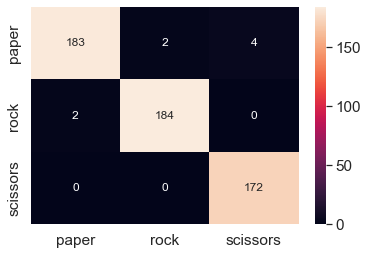

          paper  rock  scissors
paper       183     2         4
rock          2   184         0
scissors      0     0       172


In [82]:
y_pred = model.predict(x_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
get_confusion_matrix(y_test_numeric, y_pred, save=True, savepath="weight/shallow/doc/confmat_" + str(K) + ".jpg")

In [76]:
get_classification_report(y_test_numeric, y_pred)



Classification Report

              precision    recall  f1-score   support

       paper       0.99      0.97      0.98       189
        rock       0.99      0.99      0.99       186
    scissors       0.98      1.00      0.99       172

    accuracy                           0.99       547
   macro avg       0.99      0.99      0.99       547
weighted avg       0.99      0.99      0.99       547



In [77]:
model.save("weight/shallow/shallow_"+ str(K) + ".h5")